<a href="https://colab.research.google.com/github/Prazna/Datascience/blob/master/sentimentalanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import time 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import nltk 
import io 
import unicodedata 
import numpy as np 
import re 
import string 
from numpy import linalg 
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.tokenize import PunktSentenceTokenizer 
from nltk.tokenize import PunktSentenceTokenizer 
from nltk.corpus import webtext 
from nltk.stem.porter import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer 

In [0]:
train = pd.read_csv('/content/drive/My Drive/nlp_analytics_vidhya/nlp_train.csv')
test  = pd.read_csv('/content/drive/My Drive/nlp_analytics_vidhya/nlp_test.csv')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8045 entries, 0 to 8044
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    8045 non-null   int64  
 1   title        8045 non-null   object 
 2   year         7978 non-null   float64
 3   user_review  8045 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 251.5+ KB


In [15]:
test.isna().sum()

review_id       0
title           0
year           67
user_review     0
dtype: int64

In [9]:
train.isna().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [11]:
train.describe()

,review_id,year,user_suggestion
count,17494.000000,17316.000000,17494.000000
mean,12423.216989,2016.388427,0.569795
std,7653.367660,1.390356,0.495119
min,1.000000,2011.000000,0.000000
25%,5769.250000,2015.000000,0.000000
50%,11756.500000,2017.000000,1.000000
75%,18926.750000,2018.000000,1.000000
max,25539.000000,2018.000000,1.000000


In [0]:
#plot year to identify the frequency
import matplotlib.pyplot as plt

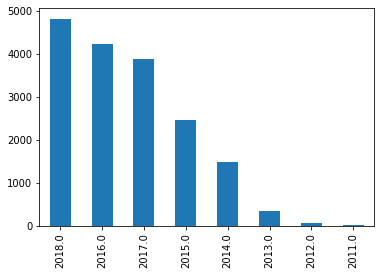

In [34]:
train['year'].value_counts().plot.bar()

plt.show()

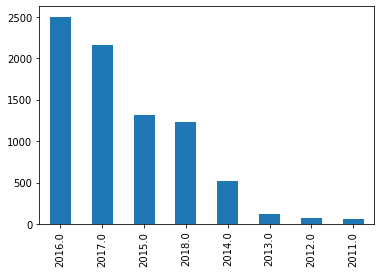

In [19]:
test['year'].value_counts().plot.bar()

In [0]:
#year has na values of total = 178 and should be replaced with the most available year - 2018
train['year'].fillna(train['year'].mode()[0],inplace = True)

In [0]:
#year has na values of total = 67 and should be replaced with the most available year - 2016
test['year'].fillna(test['year'].mode()[0],inplace = True)

In [46]:
#check to see if there are any NA's left or not
train.columns[train.isna().any()]


Index([], dtype='object')

In [23]:
#check to see if there are any NA's left or not
test.columns[test.isna().any()]

Index([], dtype='object')

In [0]:
#convert text to lowercase
train['user_review'] = train['user_review'].str.lower()

In [0]:
import nltk

In [82]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',

In [7]:
train['user_review'].head(5)


0    i'm scared and hearing creepy voices.  so i'll...
1    best game, more better than sam pepper's youtu...
2    a littly iffy on the controls, but once you kn...
3    great game, fun and colorful and all that.a si...
4    not many games have the cute tag right next to...
Name: user_review, dtype: object

In [0]:
train['user_review'] = train['user_review'].str.replace("[^a-zA-Z#]", " ")

In [0]:
train['user_review'] = train['user_review'].str.lower()

In [0]:
train['removestopwords'] = train['user_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [114]:
train['removestopwords'].head(5)

0    scared hearing creepy voices pause moment writ...
1    best game better sam pepper youtube account ne...
2    littly iffy controls know play easy master mad...
3    great game fun colorful side note though getti...
4    many games cute tag right next horror tag stea...
Name: removestopwords, dtype: object

In [0]:
train['user_text'] = train.removestopwords.apply(lambda x: x.split(' '))

In [116]:
train['user_text'].head(5)

0    [scared, hearing, creepy, voices, pause, momen...
1    [best, game, better, sam, pepper, youtube, acc...
2    [littly, iffy, controls, know, play, easy, mas...
3    [great, game, fun, colorful, side, note, thoug...
4    [many, games, cute, tag, right, next, horror, ...
Name: user_text, dtype: object

In [0]:
tokens = train['user_text'][0]

In [0]:
#Stemize and lematize the text for normalization of the text:

In [0]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [123]:
for token in tokens:
  print(token + ' --> ' + porter_stemmer.stem(token))

scared --> scare
hearing --> hear
creepy --> creepi
voices --> voic
pause --> paus
moment --> moment
write --> write
review --> review
wait --> wait
heart --> heart
beat --> beat
return --> return
atleast --> atleast
somewhat --> somewhat
calmer --> calmer
times --> time
game --> game
adorable --> ador
creepy --> creepi
like --> like
happy --> happi
tree --> tree
friends --> friend
graphics --> graphic
sceme --> sceme
childhood --> childhood
bubble --> bubbl
clean --> clean
hello --> hello
charactes --> charact
isnot --> isnot
trying --> tri
kill --> kill
likable --> likabl
bit --> bit
odd --> odd
noob --> noob
things --> thing
though --> though
oh --> oh
look --> look
class --> class
room --> room
full --> full
ghosts --> ghost
dead --> dead
children --> children
lets --> let
shine --> shine
flashlight --> flashlight
stand --> stand
staring --> stare
hmm --> hmm
creepy --> creepi
music --> music
turn --> turn
around --> around
see --> see
see --> see
chasing --> chase
never --> never


In [0]:
def stemming(row):
  for token in row:
    print(token + ' --> ' + porter_stemmer.stem(token))


In [0]:
train['stemmed_user_text']= train['user_text'].apply(lambda x: [porter_stemmer.stem(y) for y in x])

In [127]:
train['stemmed_user_text'].head(5)

0    [scare, hear, creepi, voic, paus, moment, writ...
1    [best, game, better, sam, pepper, youtub, acco...
2    [littli, iffi, control, know, play, easi, mast...
3    [great, game, fun, color, side, note, though, ...
4    [mani, game, cute, tag, right, next, horror, t...
Name: stemmed_user_text, dtype: object

In [130]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk.stem.wordnet import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [0]:
train['lemmatize_user_text']= train['user_text'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])

In [0]:
print(nltk.pos_tag(text)) 